In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/MICE2

Mounted at /content/gdrive
/content/gdrive/MyDrive/MICE2


This is a simple dataset to start with. It contains only the height (inches) and weights (pounds) of 25,000 different humans of 18 years of age. This dataset can be used to build a model that can predict the heights or weights of a human.

Link: http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html

We will compare 6 imputation methods.

In [28]:
import numpy as np
import pandas as pd

#import xgboost

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Model 1: MICE (linear Regression)


In [42]:
def init(alpha):
    df=pd.read_csv('ds.csv')
    df["Height(Inches)"]=df["Height(Inches)"]*2.54
    df["Weight(Pounds)"]=df["Weight(Pounds)"]/2.2046
    df.rename(columns={'Height(Inches)': 'Height(cm)', 
                               'Weight(Pounds)': 'Weight(kg)'}, inplace=True)
    vals_to_nan = df["Height(cm)"].sample(frac=alpha).index
    df_ancien=df.loc[vals_to_nan, "Height(cm)"]
    df_ancien=pd.DataFrame(df_ancien)
    df.loc[vals_to_nan, "Height(cm)"] = np.NaN
    return df,df_ancien,vals_to_nan

In [43]:
alpha=0.1
df,df_ancien,vals_to_nan=init(alpha)

In [44]:
n_df=df.shape[0]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index       25000 non-null  int64  
 1   Height(cm)  22500 non-null  float64
 2   Weight(kg)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [46]:
df

,Index,Height(cm),Weight(kg)
0,1,167.089607,51.253062
1,2,181.648633,61.910233
2,3,176.272800,69.412546
3,4,173.270164,64.562914
4,5,172.181037,65.452735
...,...,...,...
24995,24996,176.535461,53.538601
24996,24997,163.952580,54.519278
24997,24998,164.334317,53.644879
24998,24999,171.524117,59.996462


In [47]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=15, verbose=2, imputation_order='roman',random_state=0)
df=imp.fit_transform(df)

[IterativeImputer] Completing matrix with shape (25000, 3)
[IterativeImputer] Ending imputation round 1/15, elapsed time 0.02
[IterativeImputer] Change: 8.456641369608093, scaled tolerance: 25.0 
[IterativeImputer] Early stopping criterion reached.


In [48]:
df=pd.DataFrame(df)
df

,0,1,2
0,1.0,167.089607,51.253062
1,2.0,181.648633,61.910233
2,3.0,176.272800,69.412546
3,4.0,173.270164,64.562914
4,5.0,172.181037,65.452735
...,...,...,...
24995,24996.0,176.535461,53.538601
24996,24997.0,163.952580,54.519278
24997,24998.0,164.334317,53.644879
24998,24999.0,171.524117,59.996462


In [49]:
df.rename(columns={0: 'Index',
                    1: 'Height(cm)', 
                           2: 'Weight(kg)'}, inplace=True)
df

,Index,Height(cm),Weight(kg)
0,1.0,167.089607,51.253062
1,2.0,181.648633,61.910233
2,3.0,176.272800,69.412546
3,4.0,173.270164,64.562914
4,5.0,172.181037,65.452735
...,...,...,...
24995,24996.0,176.535461,53.538601
24996,24997.0,163.952580,54.519278
24997,24998.0,164.334317,53.644879
24998,24999.0,171.524117,59.996462


In [50]:
df_ancien

,Height(cm)
1753,173.242605
8606,164.300230
3473,172.314438
14536,175.189286
19302,167.988259
...,...
1597,175.382911
10051,173.367217
7148,171.853403
12280,171.680911


In [51]:
def error(df1,df2,n):
    return(np.linalg.norm(df1-df2)/n)
    

In [52]:
new_df=df.loc[vals_to_nan, "Height(cm)"]
new_df=pd.DataFrame(new_df)

In [53]:
error(df_ancien,new_df,alpha*n_df)

0.08249942931509774

[IterativeImputer] Completing matrix with shape (25000, 3)
[IterativeImputer] Ending imputation round 1/1, elapsed time 0.02
[IterativeImputer] Change: 7.488271811475244, scaled tolerance: 25.0 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (25000, 3)
[IterativeImputer] Ending imputation round 1/2, elapsed time 0.02
[IterativeImputer] Change: 7.369443867634118, scaled tolerance: 25.0 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (25000, 3)
[IterativeImputer] Ending imputation round 1/3, elapsed time 0.02
[IterativeImputer] Change: 9.070477351443401, scaled tolerance: 25.0 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (25000, 3)
[IterativeImputer] Ending imputation round 1/4, elapsed time 0.02
[IterativeImputer] Change: 10.12601317625382, scaled tolerance: 25.0 
[IterativeImputer] Early stopping criterion reached.
[Iterati

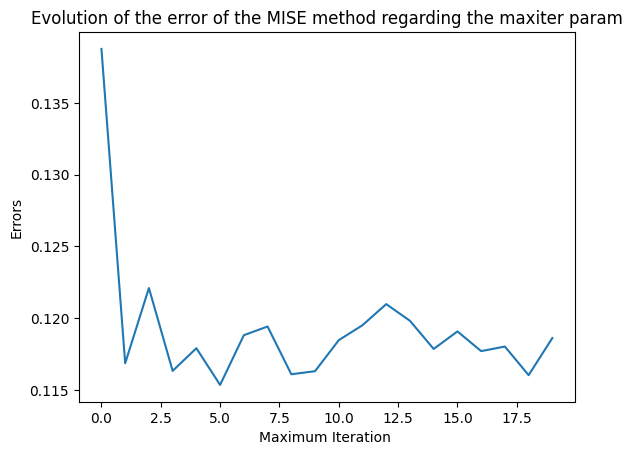

In [38]:
vals=[j for j in range(20)]
errorL=[]
for i in vals:
    df,df_ancien,vals_to_nan=init(alpha)
    lr = LinearRegression()
    imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=i, verbose=2, imputation_order='roman',random_state=0)
    df=imp.fit_transform(df)
    df=pd.DataFrame(df)
    df.rename(columns={0: 'Index',
                    1: 'Height(cm)', 
                           2: 'Weight(kg)'}, inplace=True)
    new_df=df.loc[vals_to_nan, "Height(cm)"]
    new_df=pd.DataFrame(new_df)
    errorL.append(error(df_ancien,new_df,alpha*n_df))
plt.plot(vals, errorL)
plt.title("Evolution of the error of the MISE method regarding the maxiter param")
plt.xlabel("Maximum Iteration ")
plt.ylabel("Errors")
plt.show()
    



In [24]:
def exp1(alpha):
    df,df_ancien,vals_to_nan=init(alpha)
    lr = LinearRegression()
    imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=i, verbose=2, imputation_order='roman',random_state=0)
    df=imp.fit_transform(df)
    df=pd.DataFrame(df)
    df.rename(columns={0: 'Index',
                    1: 'Height(cm)', 
                           2: 'Weight(kg)'}, inplace=True)
    new_df=df.loc[vals_to_nan, "Height(cm)"]
    new_df=pd.DataFrame(new_df)
    return error(df_ancien,new_df,alpha*n_df)
print(exp1(0.05))

[IterativeImputer] Completing matrix with shape (25000, 3)
[IterativeImputer] Ending imputation round 1/19, elapsed time 0.02
[IterativeImputer] Change: 10.044553489705066, scaled tolerance: 25.0 
[IterativeImputer] Early stopping criterion reached.
0.11882262121107535


Model 2: Constant Imputer with 'median' strategy


In [29]:
from sklearn.impute import SimpleImputer

In [54]:
def exp2(alpha):
    df,df_ancien,vals_to_nan=init(alpha)
    imputer = SimpleImputer(strategy='median')
    df=imp.fit_transform(df)
    df=pd.DataFrame(df)
    df.rename(columns={0: 'Index',
                    1: 'Height(cm)', 
                           2: 'Weight(kg)'}, inplace=True)
    df3=df.loc[vals_to_nan, "Height(cm)"]
    df3=pd.DataFrame(df3)
    df_ancien=pd.DataFrame(df_ancien)
    return error(df_ancien,df3,alpha*n_df)

print(exp2(0.1))


[IterativeImputer] Completing matrix with shape (25000, 3)
[IterativeImputer] Ending imputation round 1/15, elapsed time 0.02
[IterativeImputer] Change: 8.923011360392877, scaled tolerance: 25.0 
[IterativeImputer] Early stopping criterion reached.
0.08362253831907444


Model 3: Constant Imputer with 'mean' strategy


In [55]:
def exp3(alpha):
    df,df_ancien,vals_to_nan=init(alpha)
    imputer = SimpleImputer(strategy='mean')
    df=imp.fit_transform(df)
    df=pd.DataFrame(df)
    df.rename(columns={0: 'Index',
                    1: 'Height(cm)', 
                           2: 'Weight(kg)'}, inplace=True)
    df3=df.loc[vals_to_nan, "Height(cm)"]
    df3=pd.DataFrame(df3)
    df_ancien=pd.DataFrame(df_ancien)
    return error(df_ancien,df3,alpha*n_df)

print(exp3(0.1))

[IterativeImputer] Completing matrix with shape (25000, 3)
[IterativeImputer] Ending imputation round 1/15, elapsed time 0.02
[IterativeImputer] Change: 9.267308800349156, scaled tolerance: 25.0 
[IterativeImputer] Early stopping criterion reached.
0.08481396683130832


Model 4: Constant Imputer with 'most frequent' strategy


In [32]:
from sklearn.impute import SimpleImputer

In [56]:
def exp4(alpha):
    df,df_ancien,vals_to_nan=init(alpha)
    imputer = SimpleImputer(strategy='most_frequent')
    df=imp.fit_transform(df)
    df=pd.DataFrame(df)
    df.rename(columns={0: 'Index',
                    1: 'Height(cm)', 
                           2: 'Weight(kg)'}, inplace=True)
    df3=df.loc[vals_to_nan, "Height(cm)"]
    df3=pd.DataFrame(df3)
    df_ancien=pd.DataFrame(df_ancien)
    return error(df_ancien,df3,alpha*n_df)

print(exp4(0.1))

[IterativeImputer] Completing matrix with shape (25000, 3)
[IterativeImputer] Ending imputation round 1/15, elapsed time 0.03
[IterativeImputer] Change: 9.113279301085328, scaled tolerance: 25.0 
[IterativeImputer] Early stopping criterion reached.
0.0846168445809378


Model 5: KNN

In [34]:
from sklearn.impute import KNNImputer

In [57]:
def exp5(alpha):
    df,df_ancien,vals_to_nan=init(alpha)
    knn = KNNImputer(n_neighbors=6, add_indicator=True)
    knn.fit(df)
    df=knn.transform(df)
    df=pd.DataFrame(df)
    df.rename(columns={0: 'Index',
                    1: 'Height(cm)', 
                           2: 'Weight(kg)'}, inplace=True)
    df3=df.loc[vals_to_nan, "Height(cm)"]
    df3=pd.DataFrame(df3)
    df_ancien=pd.DataFrame(df_ancien)
    return error(df_ancien,df3,alpha*n_df)

In [58]:
resultat=exp5(0.1)
print(resultat)

0.0919898541225757


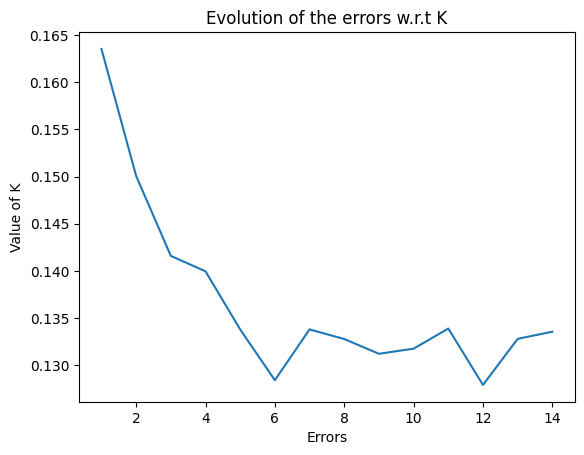

In [39]:
vals=[j for j in range(1,15)]
errorL=[]
for i in vals:
    df,df_ancien,vals_to_nan=init(alpha)
    knn = KNNImputer(n_neighbors=i, add_indicator=True)
    knn.fit(df)
    df=knn.transform(df)
    df=pd.DataFrame(df)
    df.rename(columns={0: 'Index',
                    1: 'Height(cm)', 
                           2: 'Weight(kg)'}, inplace=True)
    new_df=df.loc[vals_to_nan, "Height(cm)"]
    new_df=pd.DataFrame(new_df)
    errorL.append(error(df_ancien,new_df,alpha*n_df))
plt.plot(vals, errorL)
plt.title("Evolution of the errors w.r.t K")
plt.xlabel("Errors")
plt.ylabel("Value of K")
plt.show()

Model 6: XGboost

In [59]:
import xgboost

In [60]:
def exp6(alpha):
    df,df_ancien,vals_to_nan=init(alpha)
    iimp = IterativeImputer(
    estimator = xgboost.XGBRegressor(),
    random_state = 42,
    verbose = 2,
    )
    df=iimp.fit_transform(df)
    df=pd.DataFrame(df)
    df.rename(columns={0: 'Index',
                    1: 'Height(cm)', 
                           2: 'Weight(kg)'}, inplace=True)
    df3=df.loc[vals_to_nan, "Height(cm)"]
    df3=pd.DataFrame(df3)
    df_ancien=pd.DataFrame(df_ancien)
    return error(df_ancien,df3,alpha*n_df)
res=exp6(0.1)


[IterativeImputer] Completing matrix with shape (25000, 3)
[IterativeImputer] Ending imputation round 1/10, elapsed time 4.08
[IterativeImputer] Change: 13.212764039385036, scaled tolerance: 25.0 
[IterativeImputer] Early stopping criterion reached.


In [61]:
print(res)

0.08546105838364074


[IterativeImputer] Completing matrix with shape (25000, 3)
[IterativeImputer] Ending imputation round 1/14, elapsed time 0.16
[IterativeImputer] Change: 10.099844443877913, scaled tolerance: 25.0 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (25000, 3)
[IterativeImputer] Ending imputation round 1/19, elapsed time 0.12
[IterativeImputer] Change: 8.48884928461814, scaled tolerance: 25.0 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (25000, 3)
[IterativeImputer] Ending imputation round 1/19, elapsed time 0.09
[IterativeImputer] Change: 9.066185239933588, scaled tolerance: 25.0 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (25000, 3)
[IterativeImputer] Ending imputation round 1/19, elapsed time 0.10
[IterativeImputer] Change: 10.096234214672705, scaled tolerance: 25.0 
[IterativeImputer] Early stopping criterion reached.
[It

Text(0, 0.5, 'Error')

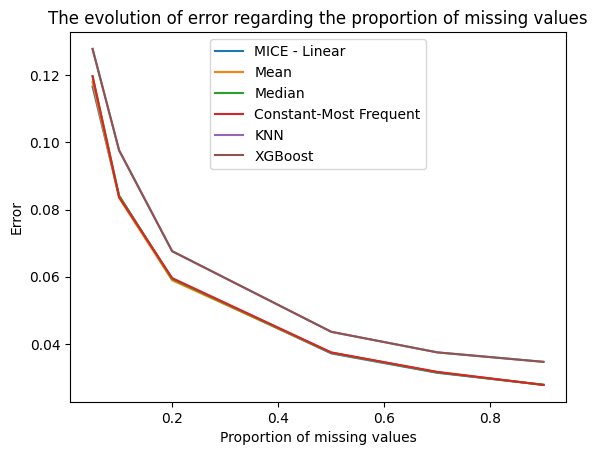

In [41]:
#variation de alpha
alpha_L=[0.05,0.10,0.20,0.50,0.70,0.90]
exp1_L=[]
exp2_L=[]
exp3_L=[]
exp4_L=[]
exp5_L=[]
exp6_L=[]
for elem in alpha_L:
    exp1_L.append(exp1(elem))
    exp2_L.append(exp2(elem))
    exp3_L.append(exp3(elem))
    exp4_L.append(exp4(elem))
    exp5_L.append(exp5(elem))
    exp6_L.append(exp6(elem))

# Tracé des graphiques
plt.plot(alpha_L, exp1_L, label='MICE - Linear')
plt.plot(alpha_L, exp2_L, label='Mean')
plt.plot(alpha_L, exp3_L, label='Median')
plt.plot(alpha_L, exp4_L, label='Constant-Most Frequent')
plt.plot(alpha_L, exp5_L, label='KNN')
plt.plot(alpha_L, exp5_L, label='XGBoost')


# Ajout de légendes, de titres et d'étiquettes d'axes
plt.legend(loc='upper center')
plt.title('The evolution of error regarding the proportion of missing values')
plt.xlabel('Proportion of missing values')
plt.ylabel("Error")